# Example in Lecture Notes

### Helper Functions

#### Import packages

In [11]:
import numpy as np 
from matplotlib import pyplot, figure
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10
from time import time

import warnings
warnings.filterwarnings("ignore")


#### Forward Time Central Difference Scheme

In [20]:
def explicitSchemeHeatEquation(sigma, barX, T, m, n, BC, *extraArguments):
    dx = barX / (m - 1) # Grid step in space
    dt = T / n
    # Grid step in time
    # Boundary conditions
    x = np.linspace(0.0, barX, m)
    u = BC(x)
    rhs = np.zeros(m)
    for l in range(0, n):
        rhs[1:-1] = dt * (0.5 * sigma * sigma) * \
            (u[:-2] - 2.0 * u[1:-1] + u[2:]) / (dx * dx)
        u += rhs
    return [x, u]

#### Boundary conditions in the example from the lecture note

In [21]:
def f(z):
    u = np.zeros(len(z))
    for i in range(len(z)):
        if z[i] < 0.5:
            u[i] = 2.0 * z[i]
        else:
            u[i] = 2.0 * (1.0 - z[i])
    return u

#### Run Simulation

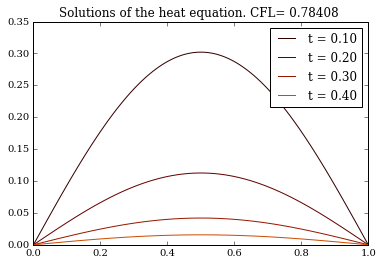

In [23]:
sigma = np.sqrt(2.0)
barX = 1.0
T = 0.001
nx = 100 # Number of grid points in space
nt = 10000 # Number of time steps

TT = np.arange(0.1, 0.5, 0.1)
for T in TT:
    [x, u] = explicitSchemeHeatEquation(sigma, barX, T, nx, nt, f)
    plotlabel = "t = %1.2f" % T
    pyplot.plot(x, u, label=plotlabel, color=pyplot.get_cmap('afmhot')(T))
    pyplot.legend()
    
dx = barX / (nx - 1)
dt = T / nt
cfl = sigma * sigma * dt / (dx * dx)
pyplot.title("Solutions of the heat equation. CFL= %s " % cfl)
pyplot.show()

